In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns 
import scipy


In [2]:
al_gdf = gpd.read_file("/Users/rebeccawagner/Documents/GitHub/GerryGainMCMC/Data/State shp files /AL/Alabama_VTD_District_Intersection.shp")
al_gdf["cd_117"] = al_gdf['cd_117'].str.replace('0100','')
al_gdf["blk_pct"] = al_gdf["blk_1"]/al_gdf["total"]

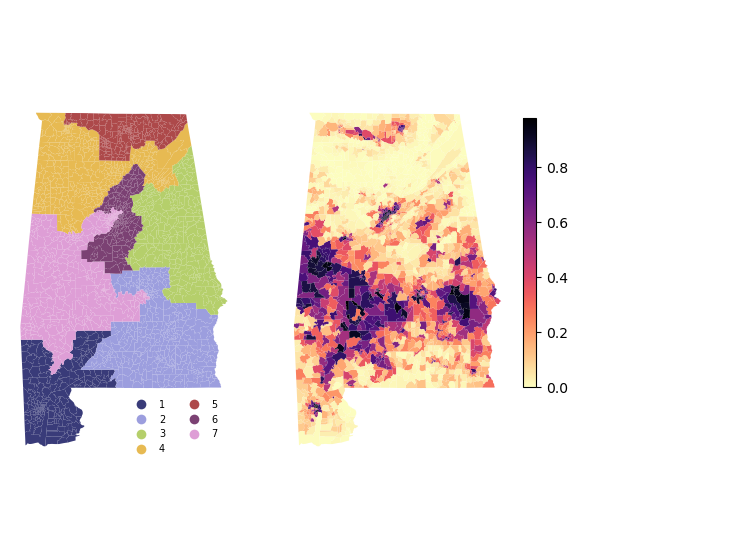

In [3]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,7))

al_gdf.plot(column="cd_117", cmap = "tab20b", legend=True, ax=ax1,
            legend_kwds={'loc': 'lower right', 'ncols':2, 'fontsize': 7, 'markerscale':.7, "loc": "lower right","bbox_to_anchor":(.95,0),"frameon":False})

al_gdf.plot(column='blk_pct', ax=ax2, cmap='magma_r', legend=True,
            legend_kwds= {'location':'right','ax':ax3, 'shrink':.5, 'anchor':(-11,.6)})

ax1.axis("off")
ax2.axis("off")
ax3.axis("off")

plt.show()

## Convergence

In [6]:
data_2 = pd.read_csv('/Users/rebeccawagner/Desktop/new_seg_100_200_300_400_50000all')
data_2 = data_2.set_index('Unnamed: 0')
data_2.index.name = None
data_2.columns = [int(x) for x in data_2.columns]
data_2.columns = [x+100000 for x in data_2.columns]

In [13]:
data_2.columns = [int(x) for x in data_2.columns]
data_2.columns = [x+100000 for x in data_2.columns]

In [14]:
data_2

,100001,100002,100003,100004,100005,100006,100007,100008,100009,100010,...,149991,149992,149993,149994,149995,149996,149997,149998,149999,150000
1003,0.070795,0.070795,0.070795,0.205446,0.205446,0.205446,0.205446,0.205446,0.205446,-4.231373,...,1.778590,1.778590,-9.475233,-9.475233,-9.475233,-9.475233,-9.475233,-9.475233,-9.475233,-9.475233
1004,-4.172792,-4.172792,-4.172792,-4.172792,-4.172792,-4.172792,-4.172792,-4.172792,-4.172792,0.266311,...,3.031580,3.031580,3.031580,0.607457,0.607457,-8.860687,-10.038407,-10.027363,-10.027363,-10.027363
1001,0.024344,0.024344,0.024344,0.024344,-0.992626,-0.992626,-4.657546,-4.657546,-4.948593,-4.948593,...,-2.747344,-2.747344,-2.747344,-2.747344,0.085791,0.085791,0.085791,0.085791,0.085791,0.085791
1002,-5.561086,-5.332671,-0.367072,-0.367072,-0.367072,0.184381,0.184381,0.184381,0.184381,0.184381,...,-8.397486,-9.220695,-9.220695,-9.220695,-9.220695,0.259564,0.259564,0.231760,0.231760,0.231760
1006,-6.025775,-6.025775,-6.025775,-6.151819,-6.151819,-6.151819,-2.479183,-9.497244,-9.213775,-9.213775,...,-10.461637,-10.461637,0.729000,0.729000,-2.369600,-2.369600,-1.193742,-1.193742,-0.438691,-0.903544
1005,0.068205,0.068205,-4.905632,-4.905632,-4.905632,-5.466624,-5.466624,1.588001,1.588001,1.588001,...,-0.012522,0.821271,0.821271,3.258538,3.258538,3.258538,3.258538,3.258538,3.258538,3.258538
1007,-1.201507,-1.441602,-1.441602,-1.441602,-0.422373,-0.422373,-0.422373,-0.422373,-0.422373,-0.422373,...,0.201735,0.201735,0.201735,0.201735,0.201735,0.201735,0.201735,0.201735,-0.553260,-0.085755


In [4]:
# Get the data

seg_data = pd.read_csv("/Users/rebeccawagner/Desktop/Seg_100_200_300_400_500_600_700_800_900_100000all")
seg_data = seg_data.set_index('Unnamed: 0')
seg_data.index.name = None
original_sores = seg_data["1"]
seg_data = seg_data.drop(columns="1")

# Get all scores as list in order
seg_scores = np.sort(seg_data.stack().values)

seg_data

,2,3,4,5,6,7,8,9,10,11,...,99991,99992,99993,99994,99995,99996,99997,99998,99999,100000
1001,18.550356,18.550356,18.550356,18.550356,18.550356,0.358454,3.070203,3.070203,3.070203,3.070203,...,0.024344,0.024344,0.024344,0.024344,0.024344,0.024344,0.024344,0.024344,0.024344,0.024344
1002,-7.150571,-4.876559,-8.571489,-3.834800,-7.021390,-7.021390,-7.021390,-7.021390,-8.584359,-8.584359,...,-2.693441,-2.693441,-2.693441,-2.727846,-0.960961,-3.534086,-3.613833,-3.613833,-4.994887,-5.561086
1003,-3.792898,-6.062259,-2.364924,-7.112741,-3.919550,-3.919550,-3.919550,-3.919550,-2.374068,-2.374068,...,0.070795,0.070795,0.070795,0.070795,0.070795,0.070795,0.070795,0.070795,0.070795,0.070795
1004,-10.025746,-10.025746,-10.025746,-10.025746,-10.025746,-10.025746,-10.025746,1.028736,1.028736,1.028736,...,-6.019538,-4.182597,-6.000567,-6.000567,-6.000567,-6.000567,-6.000567,-4.172792,-4.172792,-4.172792
1005,0.198728,0.198728,0.198728,0.198728,0.198728,0.198728,0.198728,-10.830530,-10.830530,1.297119,...,-0.024269,-0.024269,-0.024269,-0.024269,-0.024269,-0.024269,0.068205,0.068205,0.068205,0.068205
1006,-14.170530,-14.170530,-14.170530,-14.170530,-14.170530,4.315877,1.627208,1.627208,1.627208,-10.479123,...,-4.178607,-6.017521,-4.201834,-4.201834,-4.201834,-4.201834,-4.201834,-6.025775,-6.025775,-6.025775
1007,-0.531932,-0.531932,-0.531932,-0.531932,-0.531932,-0.531932,-0.531932,-0.531932,-0.531932,-0.531932,...,-4.011129,-4.011129,-4.011129,-3.975499,-5.745745,-3.166845,-3.166845,-3.166845,-1.783916,-1.201507


In [15]:
new_data = seg_data.merge(right=data_2, right_index=True,left_index=True)

In [17]:
new_data
seg_scores = np.sort(new_data.stack().values)

In [4]:
meta_data = pd.read_csv("/Users/rebeccawagner/Desktop/Meta_100_200_300_400_500_600_700_800_900_100000all")
meta_data.columns = [x.replace(".0","") for x in list(meta_data.columns)]
meta_data = meta_data.transpose()

new_header = meta_data.iloc[0]
meta_data = meta_data[1:]
meta_data.columns = new_header

meta_data

Iteration,incumbent_issues,prop_uncut_edges,county_splits,num_split_counties,oversplit_counties,black_majority
1,0.0,0.916444,6.0,6.0,0.0,1.0
2,0.0,0.916635,10.0,10.0,0.0,1.0
3,0.0,0.914727,13.0,12.0,1.0,1.0
4,0.0,0.916063,15.0,14.0,1.0,1.0
5,0.0,0.913964,17.0,17.0,0.0,1.0
...,...,...,...,...,...,...
99996,1.0,0.936475,18.0,15.0,3.0,0.0
99997,1.0,0.936093,18.0,15.0,3.0,0.0
99998,1.0,0.936856,18.0,15.0,3.0,0.0
99999,1.0,0.938192,18.0,15.0,3.0,0.0


In [5]:
meta_data['black_majority'].max()

1.0

In [7]:
# iterations where there are incumbent issues
incumbent_id = meta_data["incumbent_issues"] > 1
to_drop = list(meta_data[incumbent_id].index)

dropped_meta = meta_data.drop(to_drop)

seg_dropped = seg_data.drop(columns=to_drop)


In [8]:
#10,50,75 percent of the final dataset

seg_10 = seg_dropped.iloc[:,:10000]
seg_50 = seg_dropped.iloc[:,:50000]
seg_75 = seg_data.iloc[:,:75000]

In [9]:
seg_dropped.iloc[:1,:5000]

,2,3,4,5,6,7,8,9,10,11,...,4992,4993,4994,4995,4996,4997,4998,4999,5000,5001
1001,18.550356,18.550356,18.550356,18.550356,18.550356,0.358454,3.070203,3.070203,3.070203,3.070203,...,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421,-0.141421


In [10]:
dist_1 = seg_dropped.iloc[:1:]
dist_2 = seg_dropped.iloc[1:2:]
dist_3 = seg_dropped.iloc[2:3:]
dist_4 = seg_dropped.iloc[3:4:]
dist_5 = seg_dropped.iloc[4:5:]
dist_6 = seg_dropped.iloc[5:6:]
dist_7 = seg_dropped.iloc[6:7:]

In [11]:
data = [dist_1.stack().values,
         dist_2.stack().values,
         dist_3.stack().values,
         dist_4.stack().values,
         dist_5.stack().values,
         dist_6.stack().values,
         dist_7.stack().values]

data_10 = [seg_dropped.iloc[:1,:10000].stack().values,
         seg_dropped.iloc[1:2,:10000].stack().values,
         seg_dropped.iloc[2:3,:10000].stack().values,
         seg_dropped.iloc[3:4,:5000].stack().values,
         seg_dropped.iloc[4:5,:5000].stack().values,
         seg_dropped.iloc[5:6,:5000].stack().values,
         seg_dropped.iloc[6:7,:5000].stack().values]

        


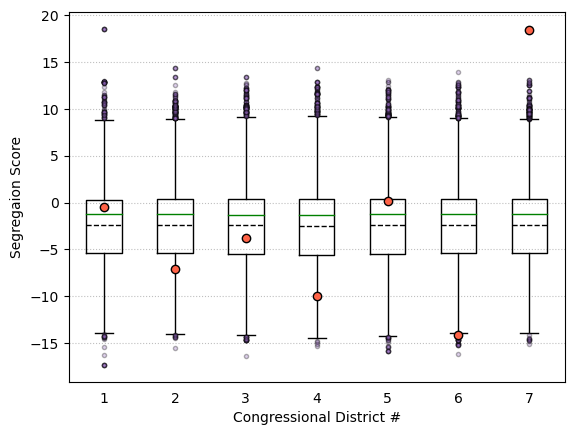

In [21]:
fig, ax = plt.subplots(1,1)

ax.boxplot(data, showmeans=True, meanline=True, showfliers=True,
            flierprops = {'marker':'.',"markerfacecolor":"C4", "markeredgecolor": None, "alpha": .3},
            medianprops ={'color':'green'},
            meanprops = {'color': "black"})

ax.scatter(np.linspace(1,7,num=7), original_sores, c='tomato', edgecolors = 'black', zorder=10)

plt.xlabel("Congressional District #")
plt.ylabel("Segregaion Score")
plt.tick_params(axis='x',bottom=False)
#plt.ylim((-12,12))

ax.grid(which='major', axis='y', linestyle=':', color='gray', alpha=0.5)

plt.savefig(fname='100k_whiskers')
plt.show()

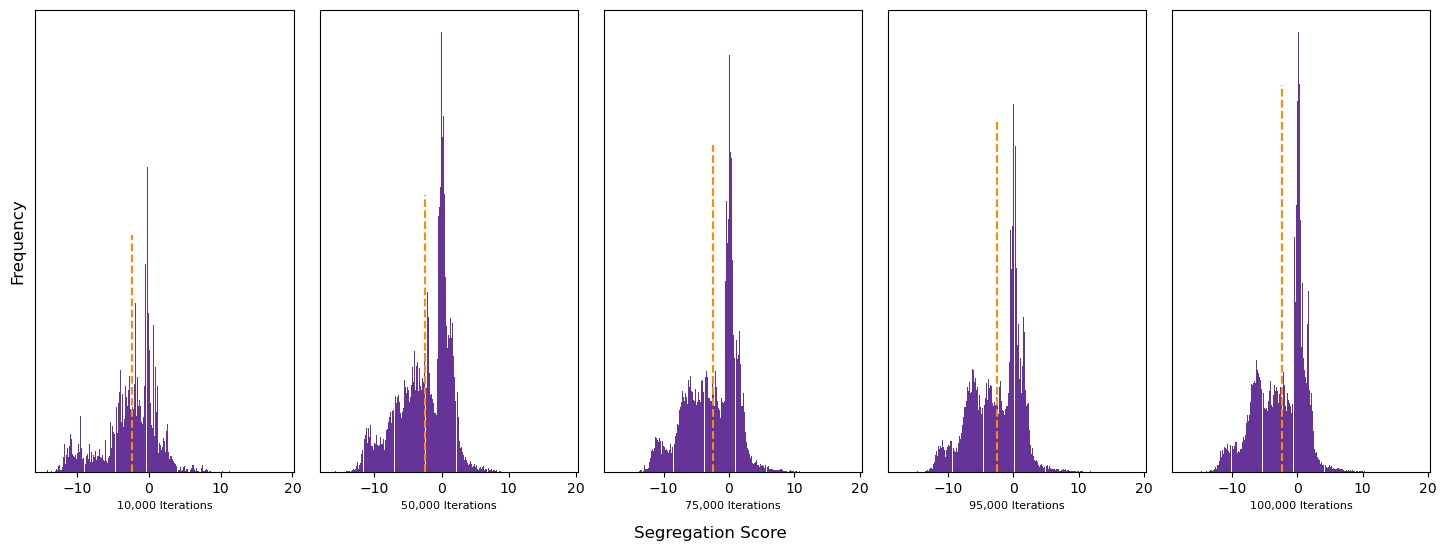

In [41]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols = 5, figsize=(18,6))\

ax1.hist(seg_data.iloc[:,:10000].stack().values, bins=1000, rwidth=.99, color="rebeccapurple")
ax1.vlines(np.mean(seg_data.iloc[:,:10000].stack().values),0,700, colors='darkorange', linestyles='dashed')

ax2.hist(seg_data.iloc[:,:50000].stack().values, bins=1000, rwidth=.99, color="rebeccapurple")
ax2.vlines(np.mean(seg_data.iloc[:,:50000].stack().values),0,2500, colors='darkorange', linestyles='dashed')

ax3.hist(seg_data.iloc[:,:75000].stack().values, bins=1000, rwidth=.99, color="rebeccapurple")
ax3.vlines(np.mean(seg_data.iloc[:,:75000].stack().values),0,5000, colors='darkorange', linestyles='dashed')

ax4.hist(seg_data.iloc[:,:95000].stack().values, bins=1000, rwidth=.99, color="rebeccapurple")
ax4.vlines(np.mean(seg_data.iloc[:,:95000].stack().values),0,7000, colors='darkorange', linestyles='dashed')

ax5.hist(seg_data.stack().values, bins=1000, rwidth=.99, color="rebeccapurple")
ax5.vlines(np.mean(seg_data.stack().values),0,8000, colors='darkorange', linestyles='dashed')

for ax in (ax1, ax2, ax3, ax4, ax5):  
    ax.grid(which='major', axis='y', linestyle=':', color='gray', alpha=0.5)
    ax.set_yticks([])

ax1.set_xlabel("10,000 Iterations", fontsize=8)
ax2.set_xlabel("50,000 Iterations",fontsize=8)
ax3.set_xlabel("75,000 Iterations",fontsize=8)
ax4.set_xlabel("95,000 Iterations",fontsize=8)
ax5.set_xlabel("100,000 Iterations",fontsize=8)

fig.text(.5,0, "Segregation Score", ha='center', fontsize=12)

ax1.set_ylabel("Frequency", fontsize=12)

plt.subplots_adjust(wspace=.1)
plt.savefig("Hist_compare_y")
plt.show()

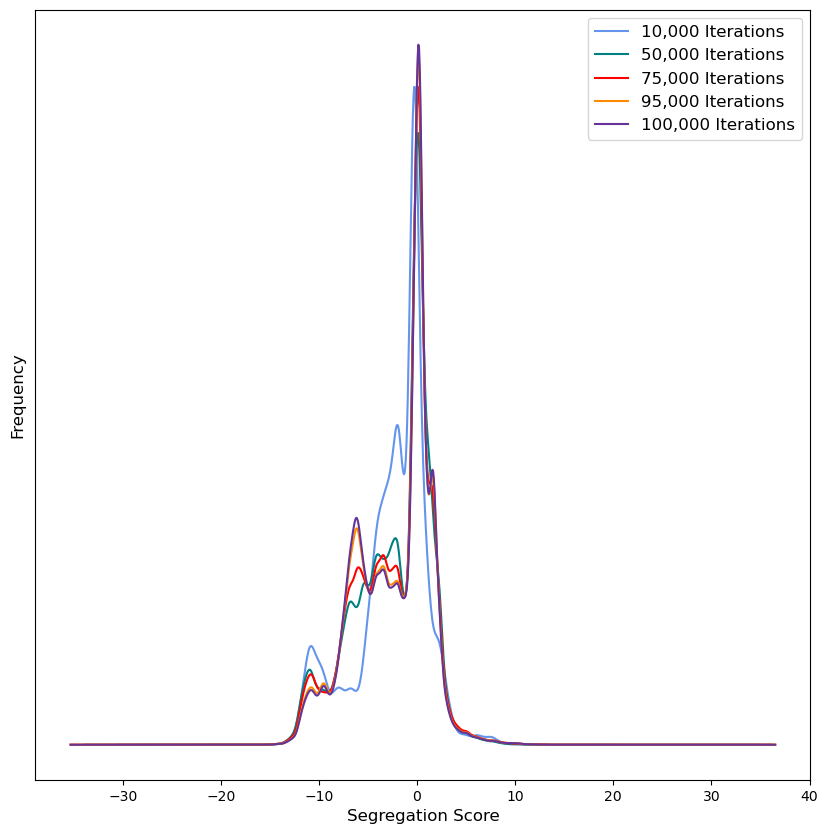

In [30]:
fig1, ax1 = plt.subplots(figsize=(10,10))

#ax1.hist(seg_data.iloc[:,:1000].stack().values, bins=500, rwidth=1, alpha=.3, color="b", label="all", density=True)
pd.DataFrame(seg_data.iloc[:,:10000].stack().values).plot(kind='density', ax=ax1, color="cornflowerblue",legend=False)

#x1.hist(seg_data.iloc[:,:5000].stack().values, bins=500, rwidth=1, alpha=.3, color="red", label="all", density=True)
pd.DataFrame(seg_data.iloc[:,:50000].stack().values).plot(kind='density', ax=ax1, color="teal",legend=False)

#ax1.hist(seg_data.iloc[:,:7500].stack().values, bins=500, rwidth=1, alpha=.3, color="green", label="all", density=True)
pd.DataFrame(seg_data.iloc[:,:75000].stack().values).plot(kind='density', ax=ax1, color="red",legend=False)

#ax1.hist(seg_data.iloc[:,:7500].stack().values, bins=500, rwidth=1, alpha=.3, color="green", label="all", density=True)
pd.DataFrame(seg_data.iloc[:,:95000].stack().values).plot(kind='density', ax=ax1, color="darkorange",legend=False)

#ax1.hist(seg_data.stack().values, bins=500, rwidth=1, alpha=.3, color="purple", label="all", density=True)
pd.DataFrame(seg_data.stack().values).plot(kind='density', ax=ax1, color="rebeccapurple",legend=False)

plt.legend(labels=["10,000 Iterations", "50,000 Iterations", "75,000 Iterations", "95,000 Iterations", "100,000 Iterations"],
            prop={'size':12})
ax1.set_xlabel("Segregation Score", fontsize=12)
ax1.set_ylabel("Frequency", fontsize=12)
ax1.set_yticks([])

plt.savefig("line_compare")
plt.show()

/var/folders/25/yq9cvx4n7714ymc6mt488mw80000gn/T/ipykernel_29126/306179983.py:27: UserWarning: The label '_Hidden Label' of <matplotlib.lines.Line2D object at 0x1662c1900> starts with '_'. It is thus excluded from the legend.
  plt.legend(["GerryChain","_Hidden Label","ALARM"])


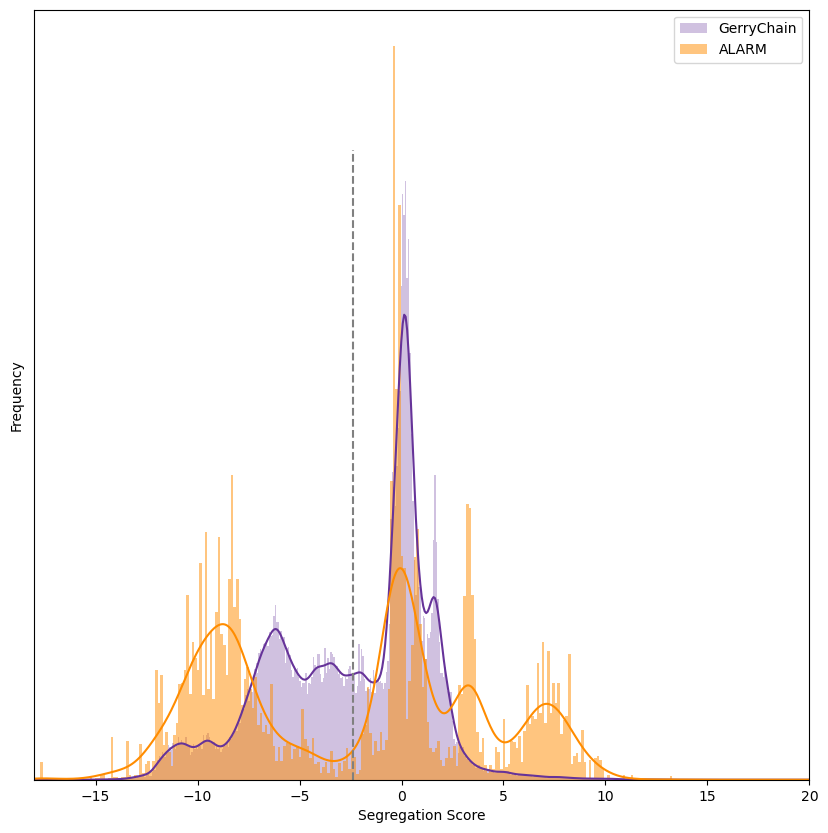

In [40]:
alarm_data = pd.read_csv("/Users/rebeccawagner/Documents/GitHub/GerryGainMCMC/alarm_seg_scores_alabama.csv")["seg_nh_black"]
alarm_data_scores = np.sort(alarm_data.values)
alarm_data_scores

fig, ax = plt.subplots(figsize=(10,10))

ax.hist(seg_scores, bins=500, rwidth=1, alpha=.3, color="rebeccapurple", density=True, label='_Hidden label')
ax = pd.DataFrame(seg_scores).plot(kind='density', ax=ax, color="rebeccapurple",label="GerryChain")

ax.hist(alarm_data_scores, bins=250, rwidth=1, alpha=.5, color="darkorange", density=True, label='_Hidden label')
ax = pd.DataFrame(alarm_data_scores).plot(kind='density', ax=ax, color="darkorange",label="ALARM")
 
#ax.grid(which='major', axis='y', linestyle=':', color='gray', alpha=0.5)

ax.vlines(x=np.mean(seg_scores),ymin=0,ymax=.35, color="grey",linestyle="dashed")


ax.set_xlabel("Segregation Score")
ax.set_ylabel("Frequency")

ax.axes.yaxis.set_ticks([])

#plt.xticks(list(plt.xticks()[0])+ ticks)
plt.xlim((-18,20))


plt.legend(["GerryChain","_Hidden Label","ALARM"])
plt.savefig("hist_compare_3")
plt.show()

In [82]:
stats = pd.DataFrame(index=[["Mean","Median","Maximum","Minimum","Standard Deviation"]])
stats

""
Mean
Median
Maximum
Minimum
Standard Deviation


In [ ]:
[np.mean(x), np.median(x), np.max(x), np.min(x), np.std(x)]

In [84]:
i = []
for x in [seg_10.stack().values, seg_50.stack().values, seg_75.stack().values, seg_dropped.stack().values]:
    info = [np.mean(x), np.median(x), np.max(x), np.min(x), np.std(x)]
    i.append(info)

    

In [90]:
original_sores

1001    -0.449858
1002    -7.150571
1003    -3.792898
1004   -10.025746
1005     0.198728
1006   -14.170530
1007    18.428387
Name: 1, dtype: float64

## Ron's Stuff

In [23]:
new_data.index

Int64Index([1001, 1002, 1003, 1004, 1005, 1006, 1007], dtype='int64')

In [21]:
n_steps_kde = 10
kde_steps = np.logspace(2, np.log10(150000), n_steps_kde).astype(int)
kde_steps

array([   100,    225,    507,   1144,   2579,   5814,  13103,  29532,
        66556, 150000])

TypeError: can only concatenate str (not "int") to str

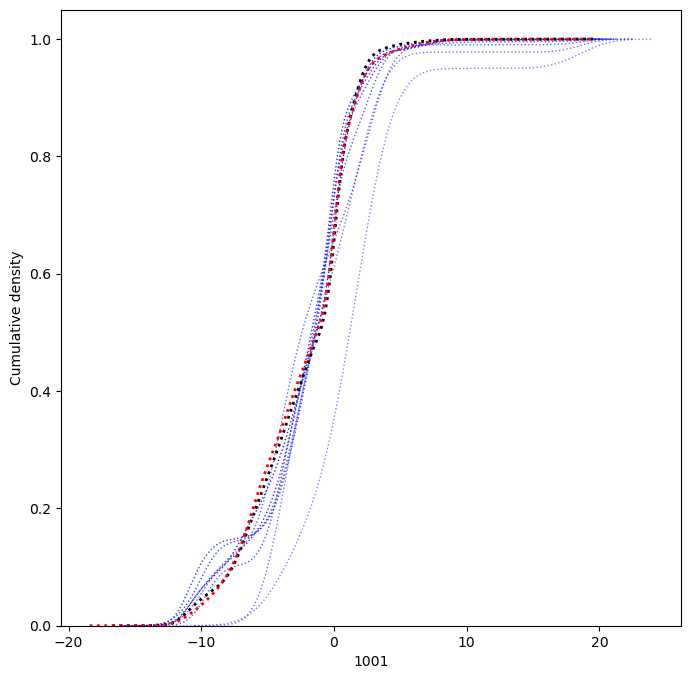

In [24]:
ex_dist = 1001
temp = new_data.loc[ex_dist]


alphas = np.linspace(0.5, 1, len(kde_steps))
plt.figure(figsize=(8,8))
for i,s in enumerate(kde_steps):
    
    # Show smaller samples as thin blue dotted with varying alpha
    # Show final two as dotted black and dotted red, thick
    
    if i == (len(kde_steps)-1):
        linestyle=':'
        color = 'r'
        linewidth = 2
        alpha = 1
    elif i == (len(kde_steps)-2):
        linestyle=':'
        color = 'k'
        linewidth = 2
        alpha = 1
    else:
        linestyle=':'
        color = 'b'
        linewidth = 1
        alpha = alphas[i]

    sns.kdeplot(temp[0:s], 
                color = color, 
                alpha = alpha, 
                linestyle = linestyle,
                linewidth = linewidth, 
                cumulative=True)

plt.ylabel('Cumulative density')
plt.xlabel('Segregation metric for ' + ex_dist)
plt.show()

print('Number of steps in each curve:', kde_steps)